In [44]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 주성분분석(PCA: Principal Component Analysis)
- 고차원의 데이터를 저차원의 데이터로 환원시키는 기법

In [45]:
# 2차원 배열
fruits = np.load("../Data/fruits.npy")
fruits_2d = fruits.reshape(-1,100*100)
fruits_2d.shape

(300, 10000)

---
### PCA 모델 구성하기

In [46]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50) # 300개의 데이터 중 구별이 확실한 주성분 50개 선택
pca.fit(fruits_2d)

PCA(n_components=50)

In [47]:
pca.components_.shape

(50, 10000)

In [48]:
def draw_fruits(arr,ratio=1): # ratio: 해상도 크기
    n = len(arr) # n: sample 개수
    # 한 줄에 10개씩 이미지 그리기
    # sample 개수를 10으로 나누어 전체 행 개수를 계산
    rows = int(np.ceil(n/10))
    # 행이 1개이면 열 개수는 sample 개수이고 그렇지 않으면 10개이다.
    cols = n if rows < 2 else 10

    fig, axs = plt.subplots(rows,cols,figsize=(cols*ratio,rows*ratio),squeeze=False)

    for i in range(rows):
        for j in range(cols):
            if i * 10 + j < n:
                axs[i,j].imshow(arr[i*10+j],cmap='gray_r')
            axs[i,j].axis('off')
    plt.show()

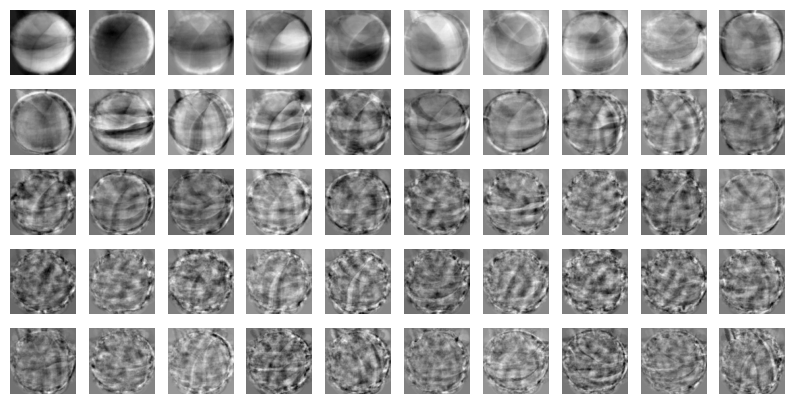

In [49]:
draw_fruits(pca.components_.reshape(-1,100,100))

> 가장 구분이 잘 되는 sample 50개 확인

In [50]:
# 행의 개수는 원본과 동일하게 하고 Feature의 특성을 50개의 주성분으로 변경하기
print(fruits_2d.shape)
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape) # 10000개의 Feature가 50개로 축소됨

(300, 10000)
(300, 50)


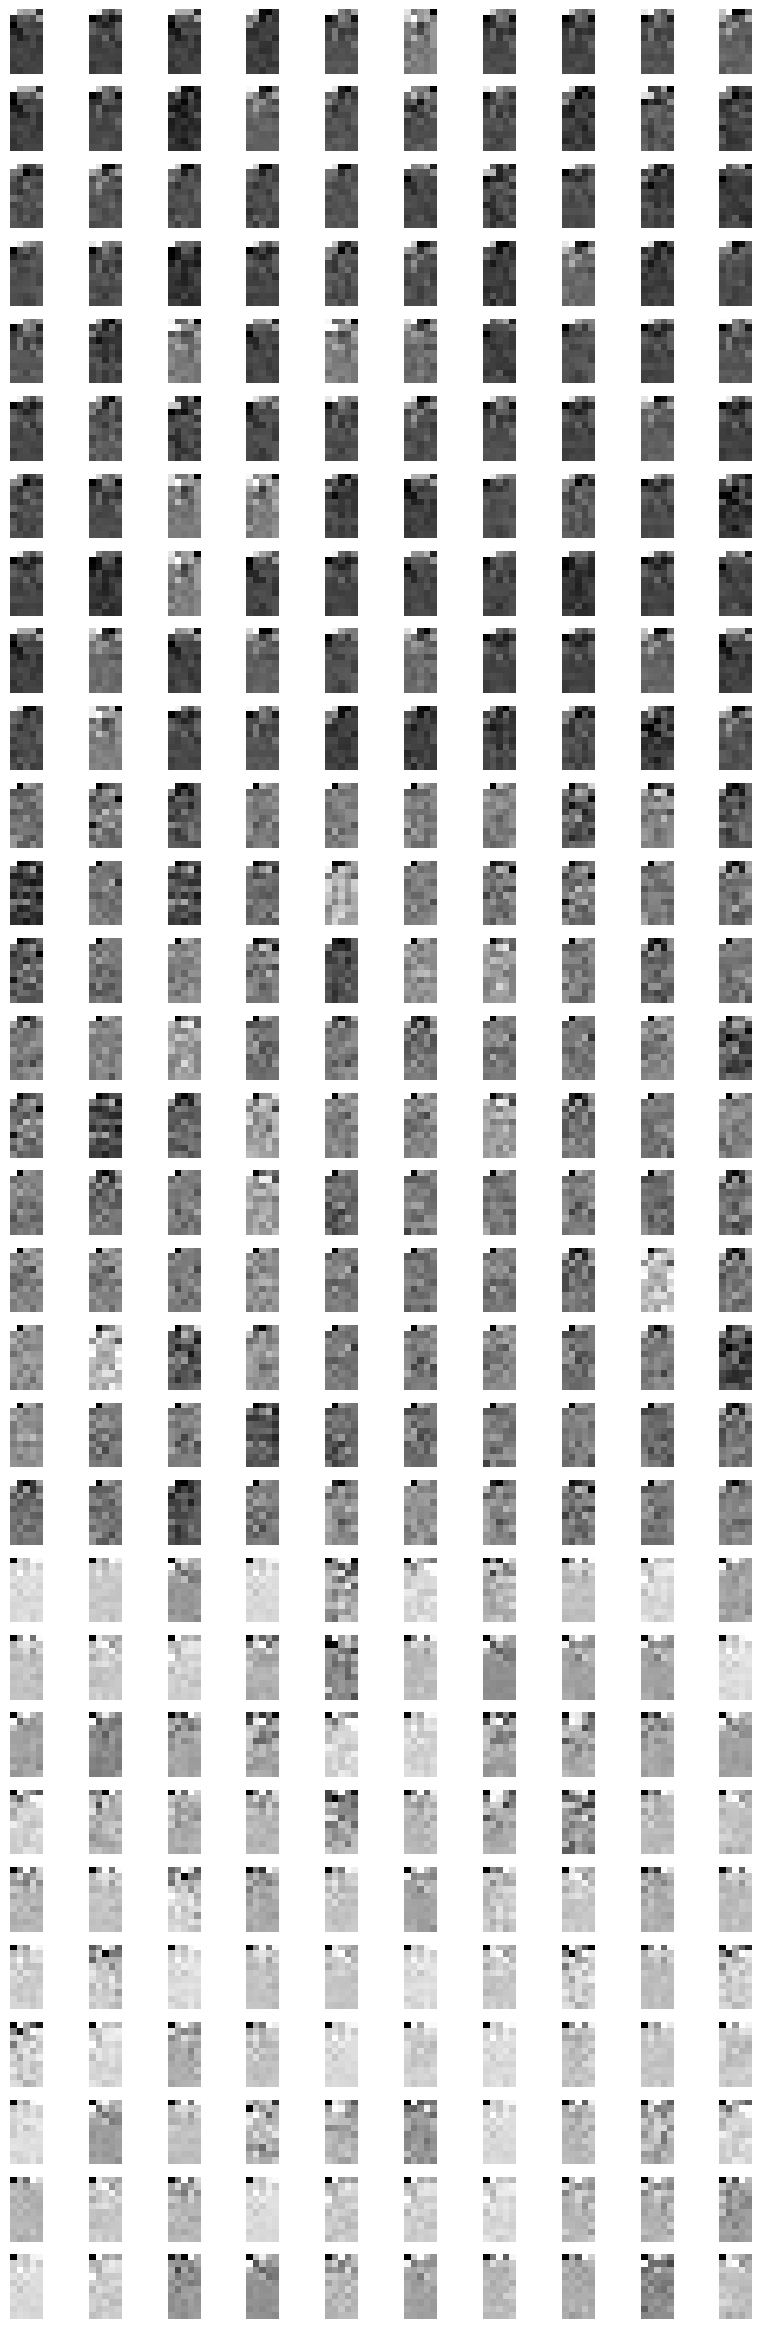

In [51]:
draw_fruits(fruits_pca.reshape(-1,10,5))

---
### 원본 데이터 재구성

In [52]:
fruits_inverse = pca.inverse_transform(fruits_pca)
fruits_inverse.shape

(300, 10000)

In [53]:
# 그림을 그리기 위해 2차원 확장
fruits_reconstruct = fruits_inverse.reshape(-1,100,100)
fruits_reconstruct.shape

(300, 100, 100)

> 특성만으로 원본 데이터 재구성이 가능하다

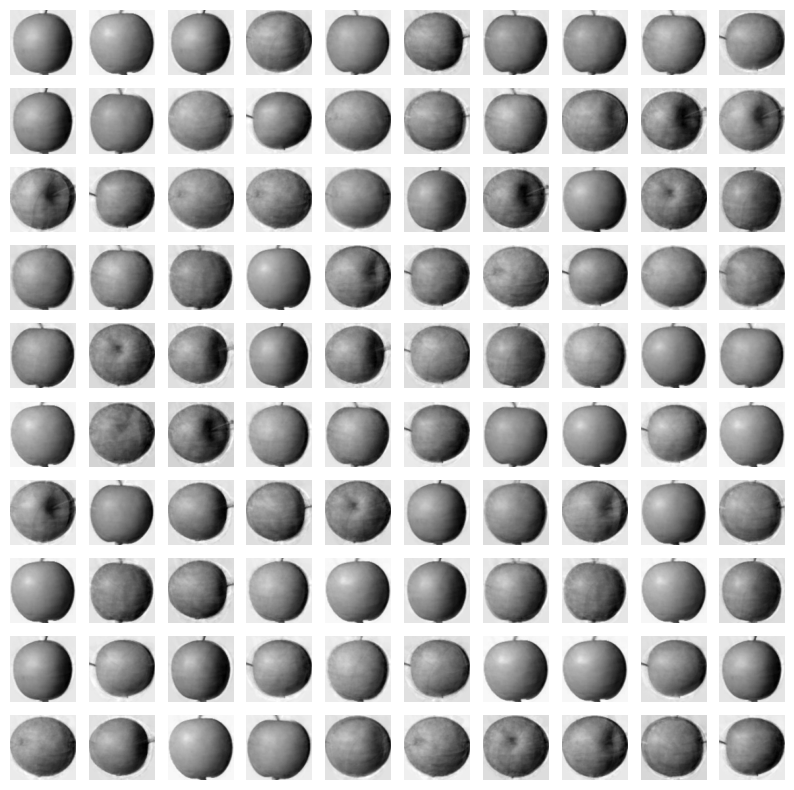

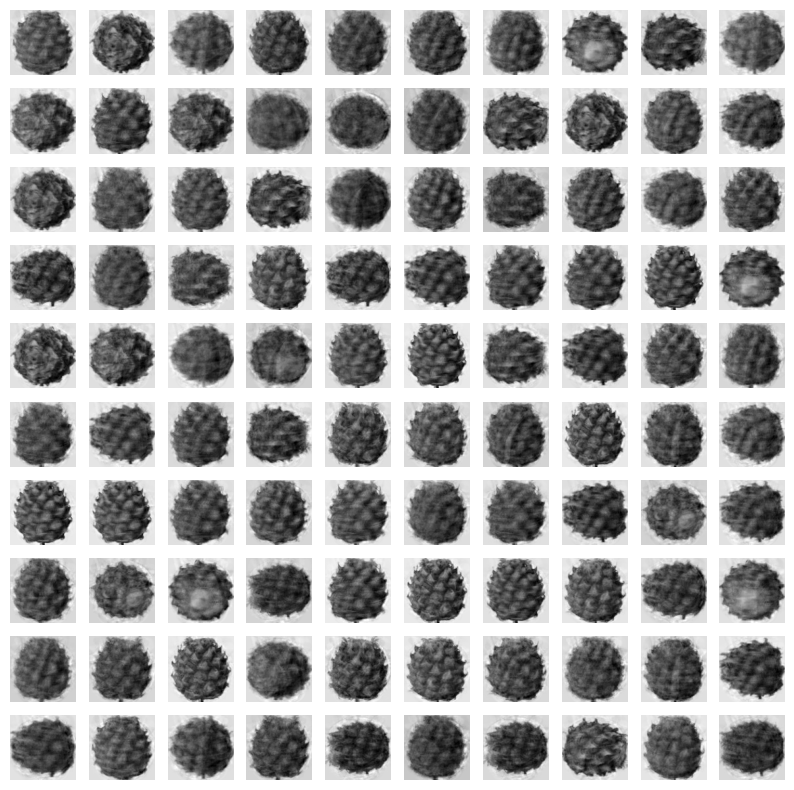

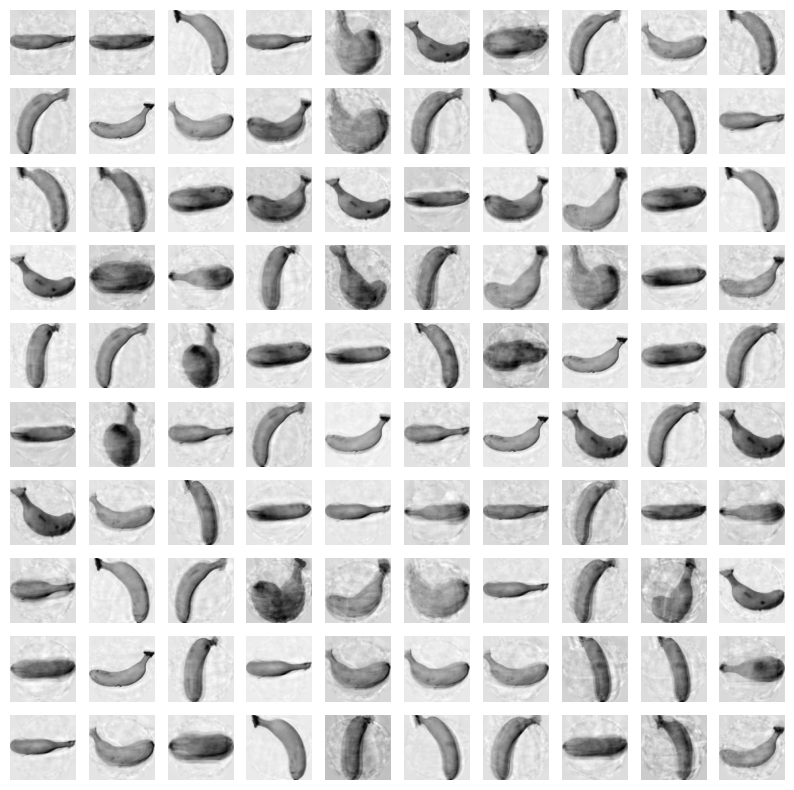

In [54]:
for start in [0,100,200]:
    draw_fruits(fruits_reconstruct[start:start+100])

1/200의 데이터 특성만 가지고도 전반적으로 배경은 깨끗하지 않으나 물체의 구분은 가능하다.

In [55]:
# 복원 능력
np.sum(pca.explained_variance_ratio_)

0.9223018971180276

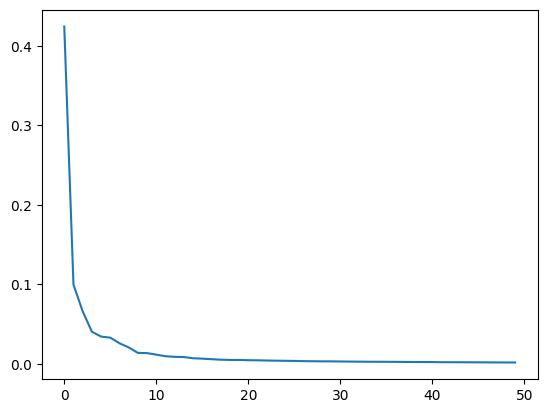

In [56]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

> 10개만 주성분으로 잡아도 문제 없을 것으로 보임

In [57]:
pca10 = PCA(n_components=10)
pca10.fit(fruits_2d)

PCA(n_components=10)

In [58]:
pca10.components_.shape

(10, 10000)

In [59]:
print(fruits_2d.shape)
fruits_pca10 = pca10.transform(fruits_2d)
print(fruits_pca10.shape)

(300, 10000)
(300, 10)


In [60]:
# 데이터 재구성
fruits_inverse_10 = pca10.inverse_transform(fruits_pca10)
fruits_inverse_10.shape

(300, 10000)

In [61]:
fruits_reconstruct_10 = fruits_inverse_10.reshape(-1,100,100)
fruits_reconstruct_10.shape

(300, 100, 100)

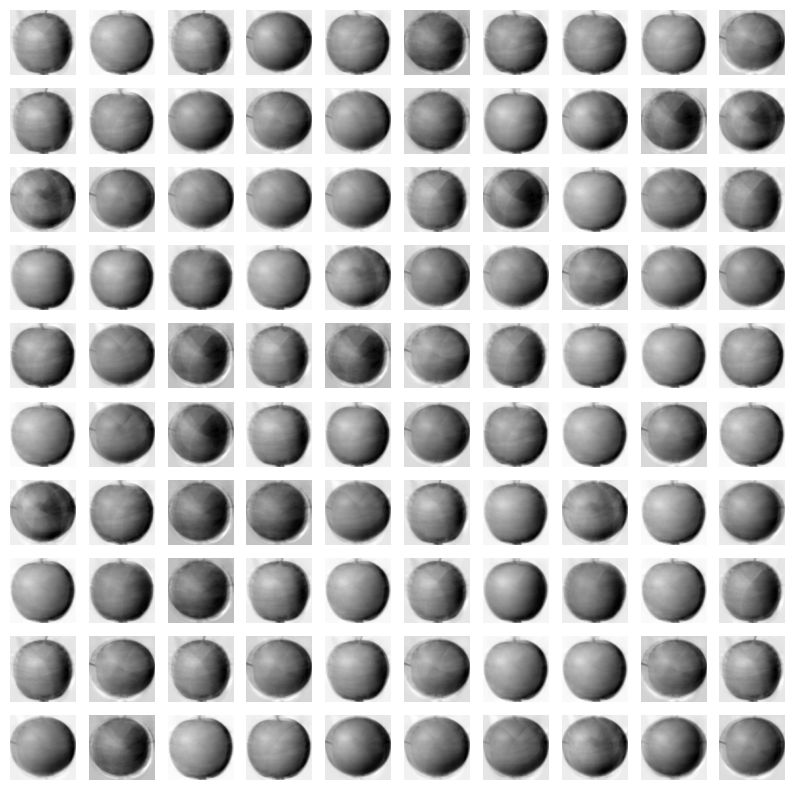

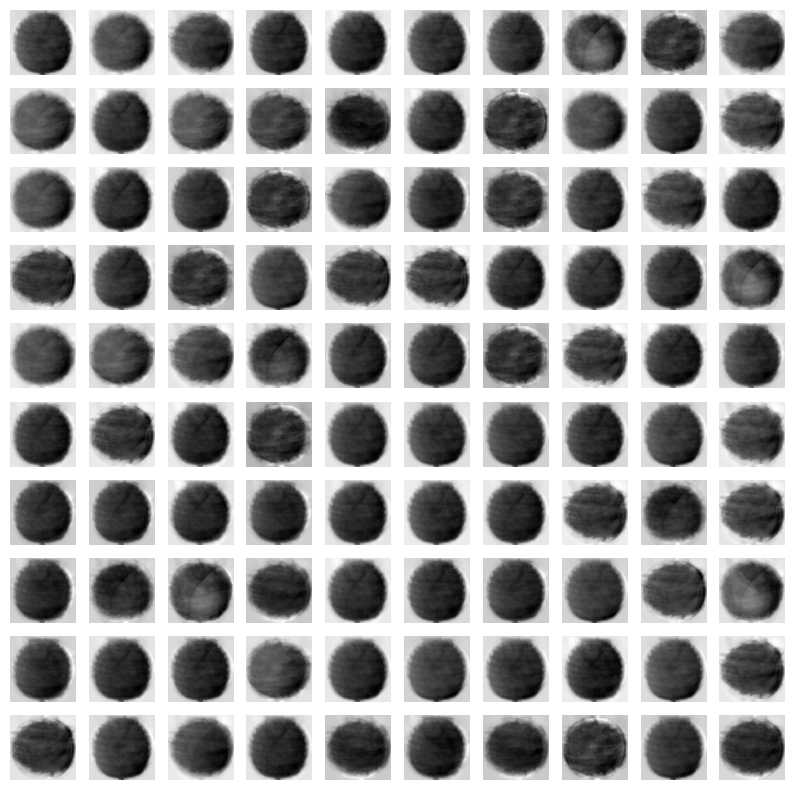

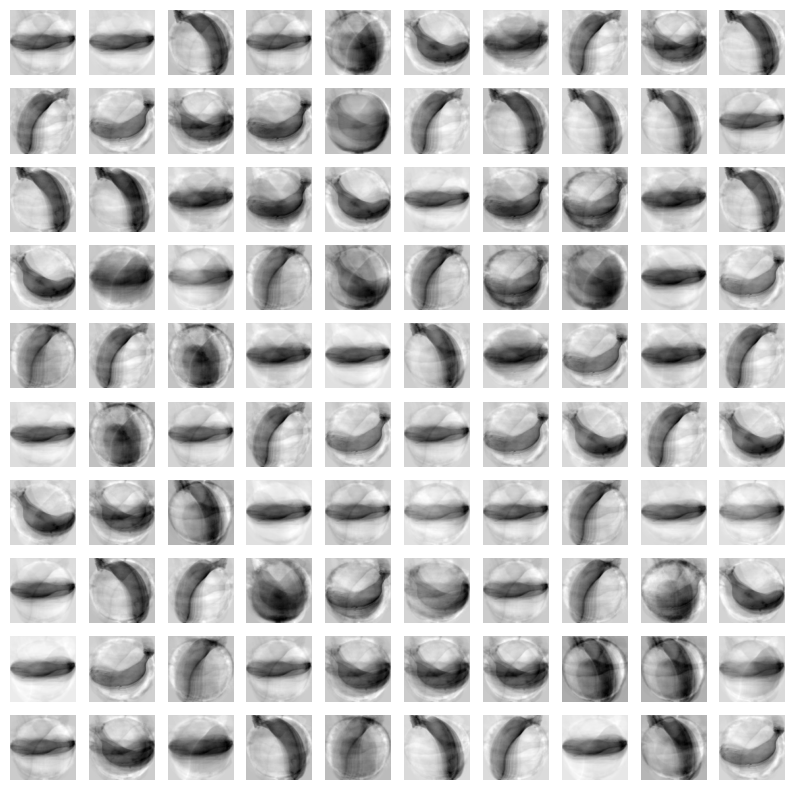

In [62]:
for start in [0,100,200]:
    draw_fruits(fruits_reconstruct_10[start:start+100])

In [63]:
# 특성 10개 복원 능력
np.sum(pca10.explained_variance_ratio_)

0.7711096063666268

> 차원 축소가 예측력에 크게 영향을 주지 않아야 함

### 로지스틱 회귀분석에 주성분 분석을 대입하여 사용해보기

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
lr = LogisticRegression()
# 로지스틱 회귀분석은 지도학습이므로 Target이 필요하다.
target = np.array([0]*100 + [1]*100 + [2]*100)

In [66]:
# 교차검증을 통해 실시
from sklearn.model_selection import cross_validate

In [70]:
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.794294023513794


In [71]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.00620417594909668


In [73]:
0.79/0.006

131.66666666666666

> 50개의 특성만 사용했는데 예측률은 100%가 나왔고 훈련속도는 130배 감소했다.    
> PCA로 차원을 축소한 결과 저장공간 뿐 만 아니라 훈련속도도 비약적으로 상승함을 확인